<a href="https://colab.research.google.com/github/chico061101/Karier.mu-Data-Analyst-Project/blob/main/Karier_mu_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pprint import pprint
from time import time
from scipy.stats import kruskal
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from datetime import datetime
import statsmodels.api as sa
import statsmodels.formula.api as sm
from scipy.stats import f_oneway
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
%matplotlib inline

# 1. Cleaning Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import data from excel
data = pd.read_excel('Final_Projek.inate.xlsx')

In [4]:
# show how many columns and rows
data.shape

(11083, 7)

###**Remove Duplicate Data**



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11083 entries, 0 to 11082
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_ujian       11083 non-null  object        
 1   id_peserta     11083 non-null  object        
 2   ujian_dimulai  11083 non-null  datetime64[ns]
 3   ujian_ditutup  11083 non-null  datetime64[ns]
 4   jenis_tes      11083 non-null  object        
 5   timestamp_log  9194 non-null   datetime64[ns]
 6   pesan_log      9194 non-null   object        
dtypes: datetime64[ns](3), object(4)
memory usage: 606.2+ KB


In [6]:
# check if there is any duplicate
print(f"there are {data.duplicated().sum()} duplicates row")

there are 55 duplicates row


In [7]:
# remove duplicates
data = data.drop_duplicates().reset_index(drop=True)

In [8]:
# check if it's work
print(f"there are {data.duplicated().sum()} duplicates row")

there are 0 duplicates row


### Missing Value

In [9]:
# check if there is any missing value
data.isna().sum()

,0
id_ujian,0
id_peserta,0
ujian_dimulai,0
ujian_ditutup,0
jenis_tes,0
timestamp_log,1889
pesan_log,1889


In [10]:
# calculate median value
median_value = data['timestamp_log'].median()

In [11]:
# fill na value with median
data['timestamp_log'].fillna(median_value, inplace=True)

In [12]:
# check again
data.isna().sum()

,0
id_ujian,0
id_peserta,0
ujian_dimulai,0
ujian_ditutup,0
jenis_tes,0
timestamp_log,0
pesan_log,1889


In [13]:
# calculate mode value
modus_value = data['pesan_log'].mode()[0]

In [14]:
data['pesan_log'].fillna(modus_value, inplace=True)

In [15]:
data.isna().sum()

,0
id_ujian,0
id_peserta,0
ujian_dimulai,0
ujian_ditutup,0
jenis_tes,0
timestamp_log,0
pesan_log,0


In [16]:
# show first 10 rows
data.head(10)

,id_ujian,id_peserta,ujian_dimulai,ujian_ditutup,jenis_tes,timestamp_log,pesan_log
0,29fbeda12fc84baaab209699439aba09,982b41ef78bcc73e9dcbb9110afce55b,2022-06-07 15:52:00,2022-06-09 21:00:00,Bidang Studi,2022-06-08 19:29:34,Selesai Tes Bidang Studi
1,29fbeda12fc84baaab209699439aba09,982b41ef78bcc73e9dcbb9110afce55b,2022-06-07 15:52:00,2022-06-09 21:00:00,Bidang Studi,2022-06-08 19:15:02,Memulai Tes Bidang Studi
2,e82a71007130c199a90961842d15b339,9f2de4269e67bd7e3d837026252a4bfb,2022-09-08 10:30:00,2022-09-09 10:30:00,Kemampuan Visual Spasial,2022-09-08 22:01:11,Selesai Tes Kemampuan Visual Spasial
3,e82a71007130c199a90961842d15b339,9f2de4269e67bd7e3d837026252a4bfb,2022-09-08 10:30:00,2022-09-09 10:30:00,Kemampuan Visual Spasial,2022-09-08 21:49:11,Memulai Tes Kemampuan Visual Spasial
4,8489127cbef60df4ff9aaeda12eeb327,b0afe01565fd69bc0c045ef84abc848e,2022-06-15 21:30:00,2022-06-16 23:59:00,Bidang Studi,2022-07-05 20:22:25,Memulai Tes Penalaran Matematika
5,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 19:02:00,Selesai Tes Kemampuan Bahasa Inggris
6,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 19:02:00,Selesai Bagian 3 Tes Kemampuan Bahasa Inggris
7,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 18:52:03,Memulai Bagian 3 Tes Kemampuan Bahasa Inggris
8,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 18:52:03,Selesai Bagian 2 Tes Kemampuan Bahasa Inggris
9,0b97e22ca7c95fdf86d97f10abd7a6c3,b88d2688d72b74a5723da96f9fa8a772,2022-06-03 23:24:00,2022-06-04 23:59:00,Kemampuan Bahasa Inggris,2022-06-04 18:41:40,Memulai Bagian 2 Tes Kemampuan Bahasa Inggris


###**Typo**

In [17]:
data["ujian_dimulai"].unique() #no impossible value

<DatetimeArray>
['2022-06-07 15:52:00', '2022-09-08 10:30:00', '2022-06-15 21:30:00',
 '2022-06-03 23:24:00', '2022-08-05 13:00:00', '2022-07-01 14:15:00',
 '2022-08-07 16:00:00', '2022-07-11 09:01:00', '2022-06-09 09:00:00',
 '2022-04-07 08:00:00',
 ...
 '2022-07-05 10:38:00', '2022-11-07 08:00:00', '2022-07-25 14:00:00',
 '2022-10-17 12:43:00', '2022-07-07 16:01:00', '2022-06-21 11:39:00',
 '2022-06-21 08:49:00', '2022-12-05 16:03:00', '2022-08-08 22:33:00',
 '2022-06-14 09:50:00']
Length: 701, dtype: datetime64[ns]

In [18]:
data["ujian_ditutup"].unique() #no impossible value

<DatetimeArray>
['2022-06-09 21:00:00', '2022-09-09 10:30:00', '2022-06-16 23:59:00',
 '2022-06-04 23:59:00', '2022-08-06 08:00:00', '2022-07-02 08:30:00',
 '2022-08-08 23:00:00', '2022-08-09 09:01:00', '2022-06-10 09:00:00',
 '2022-06-08 06:00:00',
 ...
 '2022-08-10 23:00:00', '2022-09-07 23:59:00', '2022-05-31 19:00:00',
 '2022-07-06 23:59:00', '2022-11-21 12:00:00', '2022-11-01 12:43:00',
 '2022-08-06 16:01:00', '2022-07-05 11:39:00', '2022-12-06 16:03:00',
 '2022-08-11 22:33:00']
Length: 564, dtype: datetime64[ns]

In [19]:
data["jenis_tes"].unique() # no typo

array(['Bidang Studi', 'Kemampuan Visual Spasial',
       'Kemampuan Bahasa Inggris', 'Penalaran Matematika',
       'Literasi Bahasa Indonesia'], dtype=object)

In [20]:
data["timestamp_log"].unique() #no typo (looked from excel dataset)

<DatetimeArray>
['2022-06-08 19:29:34', '2022-06-08 19:15:02', '2022-09-08 22:01:11',
 '2022-09-08 21:49:11', '2022-07-05 20:22:25', '2022-06-04 19:02:00',
 '2022-06-04 18:52:03', '2022-06-04 18:41:40', '2022-06-04 18:31:33',
 '2022-08-05 23:20:40',
 ...
 '2022-07-19 13:27:09', '2022-07-19 13:15:35', '2022-07-05 21:41:11',
 '2022-07-05 21:26:58', '2022-08-18 21:30:01', '2022-08-18 21:19:06',
 '2022-09-08 14:48:56', '2022-09-08 14:28:55', '2022-06-29 14:13:46',
 '2022-06-29 13:59:40']
Length: 6248, dtype: datetime64[ns]

In [21]:
data["pesan_log"].value_counts() #no typo

,count
pesan_log,
Memulai Tes Penalaran Matematika,2609
Selesai Tes Penalaran Matematika,704
Memulai Tes Bidang Studi,702
Selesai Tes Bidang Studi,670
Memulai Tes Kemampuan Bahasa Inggris,580
Memulai Bagian 1 Tes Kemampuan Bahasa Inggris,574
Selesai Tes Kemampuan Bahasa Inggris,573
Selesai Bagian 1 Tes Kemampuan Bahasa Inggris,572
Memulai Bagian 2 Tes Kemampuan Bahasa Inggris,572


In [22]:
#check if there is any impossible value
waktu_pengerjaan = data["ujian_ditutup"]-data["ujian_dimulai"]
negatif = waktu_pengerjaan[waktu_pengerjaan < pd.Timedelta(0)]
print(negatif)

102     -1 days +01:39:48
1927    -1 days +13:01:06
2020    -1 days +13:01:06
2229    -1 days +01:39:48
2924    -1 days +22:55:51
3903    -1 days +22:55:51
4335    -3 days +09:21:08
5111    -3 days +09:21:08
5431    -1 days +22:55:51
6168    -3 days +09:21:08
6883    -3 days +09:21:08
7632    -1 days +22:55:51
9291    -1 days +13:01:06
10350   -1 days +01:39:48
dtype: timedelta64[ns]


In [24]:
#filter which rows give negative value
negatif_value = waktu_pengerjaan[waktu_pengerjaan < pd.Timedelta(0)]
negatif_row = data.loc[negatif_value.index]
negatif_id = negatif_row["id_peserta"]
print(negatif_id)


102      7d914450e410e25a3e7cfeceae68c63d
1927     af851061344a0becc3d029622700c4c6
2020     af851061344a0becc3d029622700c4c6
2229     7d914450e410e25a3e7cfeceae68c63d
2924     6dda176ad12231f0ac24d8126c2f1239
3903     6dda176ad12231f0ac24d8126c2f1239
4335     eded70d526105028824457b08d3be0f2
5111     eded70d526105028824457b08d3be0f2
5431     6dda176ad12231f0ac24d8126c2f1239
6168     eded70d526105028824457b08d3be0f2
6883     eded70d526105028824457b08d3be0f2
7632     6dda176ad12231f0ac24d8126c2f1239
9291     af851061344a0becc3d029622700c4c6
10350    7d914450e410e25a3e7cfeceae68c63d
Name: id_peserta, dtype: object


In [25]:
negatif_value = waktu_pengerjaan[waktu_pengerjaan < pd.Timedelta(0)]
negatif_indices = negatif_value.index

# Remove rows with negative values in waktu_pengerjaan
data.drop(negatif_indices, inplace=True)

# Print the IDs of removed rows
removed_ids = negatif_row["id_peserta"]
print("Removed IDs:", removed_ids)


Removed IDs: 102      7d914450e410e25a3e7cfeceae68c63d
1927     af851061344a0becc3d029622700c4c6
2020     af851061344a0becc3d029622700c4c6
2229     7d914450e410e25a3e7cfeceae68c63d
2924     6dda176ad12231f0ac24d8126c2f1239
3903     6dda176ad12231f0ac24d8126c2f1239
4335     eded70d526105028824457b08d3be0f2
5111     eded70d526105028824457b08d3be0f2
5431     6dda176ad12231f0ac24d8126c2f1239
6168     eded70d526105028824457b08d3be0f2
6883     eded70d526105028824457b08d3be0f2
7632     6dda176ad12231f0ac24d8126c2f1239
9291     af851061344a0becc3d029622700c4c6
10350    7d914450e410e25a3e7cfeceae68c63d
Name: id_peserta, dtype: object


###**Outlier**

In [26]:
# Outlier Analysis and Identification
# Change type data
data['timestamp_log'] = pd.to_datetime(data['timestamp_log'])

In [27]:
# Analyze relevant columns
data['durasi_tes'] = (data['ujian_ditutup'] - data['ujian_dimulai']).dt.total_seconds()

In [28]:
data["durasi_tes"].value_counts()

,count
durasi_tes,
86400.0,1280
154740.0,1048
10800.0,279
172800.0,261
174925.0,234
...,...
111960.0,1
36180.0,1
381540.0,1


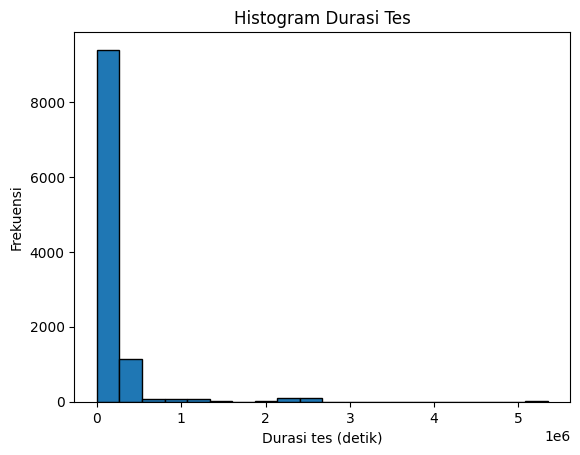

In [29]:
plt.hist(data['durasi_tes'], bins=20, edgecolor='black')
plt.title('Histogram Durasi Tes')
plt.xlabel('Durasi tes (detik)')
plt.ylabel('Frekuensi')
plt.show()


In [30]:
# make a function to check the outlier
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(data[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [32]:
#durasi_tes
upper_durasi_tes = cek_outlier('durasi_tes', 'upper_bound')
lower_durasi_tes = cek_outlier('durasi_tes', 'lower_bound')
print(f"Total outlier di kolom durasi_tes : {len(upper_durasi_tes) + len(lower_durasi_tes)}")

#ujian_dimulai
upper_ujian_dimulai = cek_outlier('ujian_dimulai', 'upper_bound')
lower_ujian_dimulai = cek_outlier('ujian_dimulai', 'lower_bound')
print(f"Total outlier di kolom ujian_dimulai : {len(upper_ujian_dimulai) + len(lower_ujian_dimulai)}")

#ujian_ditutup
upper_ujian_ditutup = cek_outlier('ujian_ditutup', 'upper_bound')
lower_ujian_ditutup = cek_outlier('ujian_ditutup', 'lower_bound')
print(f"Total outlier di kolom ujian_ditutup : {len(upper_ujian_ditutup) + len(lower_ujian_ditutup)}")

Total outlier di kolom durasi_tes : 1081
Total outlier di kolom ujian_dimulai : 293
Total outlier di kolom ujian_ditutup : 254


In [33]:
def filter_outliers(df, nama_kolom):
    if nama_kolom == 'durasi_tes':
        data_temp = df.loc[~df.index.isin(upper_durasi_tes)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_durasi_tes)]
        return data_temp
    if nama_kolom == 'ujian_dimulai':
        data_temp = df.loc[~df.index.isin(upper_ujian_dimulai)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_ujian_dimulai)]
        return data_temp
    if nama_kolom == 'ujian_ditutup':
        data_temp = df.loc[~df.index.isin(upper_ujian_ditutup)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_ujian_ditutup)]
        return data_temp

In [34]:
columns_to_filter = ['durasi_tes', 'ujian_dimulai', 'ujian_ditutup']
data_final = data.copy()
for column in columns_to_filter:
    data_final = filter_outliers(data_final, column)

print(data_final.shape)

(9664, 8)


# 1. Completion Rate

In [35]:
data_final["pesan_log"].value_counts()

,count
pesan_log,
Memulai Tes Penalaran Matematika,2268
Selesai Tes Penalaran Matematika,613
Memulai Tes Bidang Studi,609
Selesai Tes Bidang Studi,581
Selesai Bagian 2 Tes Kemampuan Bahasa Inggris,509
Selesai Bagian 1 Tes Kemampuan Bahasa Inggris,509
Selesai Bagian 3 Tes Kemampuan Bahasa Inggris,507
Memulai Bagian 3 Tes Kemampuan Bahasa Inggris,507
Memulai Bagian 1 Tes Kemampuan Bahasa Inggris,507


In [37]:
data_final['status_ujian'] = data_final['pesan_log'].apply(lambda x: 'Mengikuti Tes Bidang Studi' if 'memulai tes bidang studi' in x.lower() else 'Selesai Tes Bidang Studi' if 'selesai tes bidang studi' in x.lower()
                                                            else 'Mengikuti Tes Kemampuan Bahasa Inggris' if 'memulai tes kemampuan bahasa inggris' in x.lower() else 'Selesai Tes Kemampuan Bahasa Inggris' if 'selesai tes kemampuan bahasa inggris' in x.lower()
                                                            else 'Mengikuti Tes Kemampuan Visual Spasial' if 'memulai tes kemampuan visual spasial' in x.lower() else 'Selesai Tes Kemampuan Visual Spasial' if 'selesai tes kemampuan visual spasial' in x.lower()
                                                            else 'Mengikuti Tes Literasi Bahasa Indonesia' if 'memulai tes literasi bahasa indonesia' in x.lower() else 'Selesai Tes Literasi Bahasa Indonesia' if 'selesai tes literasi bahasa indonesia' in x.lower()
                                                            else 'Mengikuti Tes Penalaran Matematika' if 'memulai tes penalaran matematika' in x.lower() else 'Selesai Tes Penalaran Matematika' if 'selesai tes penalaran matematika' in x.lower() else 'Lainnya' )

# Showing Completion exam rate
tingkat_penyelesaian = data_final.groupby('status_ujian').size().reset_index(name='Jumlah')

kategori_urutan = [
    'Mengikuti Tes Bidang Studi', 'Selesai Tes Bidang Studi',
    'Mengikuti Tes Kemampuan Bahasa Inggris', 'Selesai Tes Kemampuan Bahasa Inggris',
    'Mengikuti Tes Kemampuan Visual Spasial', 'Selesai Tes Kemampuan Visual Spasial',
    'Mengikuti Tes Literasi Bahasa Indonesia', 'Selesai Tes Literasi Bahasa Indonesia',
    'Mengikuti Tes Penalaran Matematika', 'Selesai Tes Penalaran Matematika', 'Lainnya'
]

# pd.Categorical o establish the order of categories
tingkat_penyelesaian['status_ujian'] = pd.Categorical(tingkat_penyelesaian['status_ujian'], categories=kategori_urutan, ordered=True)

# Ordering DataFrame by categories
tingkat_penyelesaian = tingkat_penyelesaian.sort_values('status_ujian')

print(tingkat_penyelesaian)

                               status_ujian  Jumlah
1                Mengikuti Tes Bidang Studi     609
6                  Selesai Tes Bidang Studi     581
2    Mengikuti Tes Kemampuan Bahasa Inggris     506
7      Selesai Tes Kemampuan Bahasa Inggris     506
3    Mengikuti Tes Kemampuan Visual Spasial     238
8      Selesai Tes Kemampuan Visual Spasial     224
4   Mengikuti Tes Literasi Bahasa Indonesia     130
9     Selesai Tes Literasi Bahasa Indonesia     130
5        Mengikuti Tes Penalaran Matematika    2268
10         Selesai Tes Penalaran Matematika     613
0                                   Lainnya    3859


In [38]:
# Get data for all test
semua_tes = tingkat_penyelesaian[tingkat_penyelesaian['status_ujian'].str.contains('Tes Bidang Studi|Tes Kemampuan Bahasa Inggris|Tes Kemampuan Visual Spasial|Tes Literasi Bahasa Indonesia|Tes Penalaran Matematika')]

###**Tes Bidang Studi**

In [39]:
jumlah_selesai_bidang_studi = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Bidang Studi']['Jumlah'].sum()
jumlah_memulai_bidang_studi = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Bidang Studi']['Jumlah'].sum()
persentase_penyelesaian_bidang_studi = (jumlah_selesai_bidang_studi / jumlah_memulai_bidang_studi) * 100 if jumlah_memulai_bidang_studi > 0 else 0

print("Quantity of 'Selesai Tes Bidang Studi':", jumlah_selesai_bidang_studi)
print("Quantity of 'Mengikuti Tes Bidang Studi':", jumlah_memulai_bidang_studi)
print("Percentage of 'Penyelesaian Tes Bidang Studi':", persentase_penyelesaian_bidang_studi, "%")

Quantity of 'Selesai Tes Bidang Studi': 581
Quantity of 'Mengikuti Tes Bidang Studi': 609
Percentage of 'Penyelesaian Tes Bidang Studi': 95.40229885057471 %


###**Tes Kemampuan Bahasa Inggris**

In [43]:
jumlah_selesai_inggris = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Kemampuan Bahasa Inggris']['Jumlah'].sum()
jumlah_memulai_inggris = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Kemampuan Bahasa Inggris']['Jumlah'].sum()
persentase_penyelesaian_inggris = (jumlah_selesai_inggris / jumlah_memulai_inggris) * 100 if jumlah_memulai_inggris > 0 else 0

# Menampilkan hasil
print("Quantity of 'Selesai Tes Kemampuan Bahasa Inggris':", jumlah_selesai_inggris)
print("Quantity of 'Mengikuti Tes Kemampuan Bahasa Inggris':", jumlah_memulai_inggris)
print("Percentage of 'Penyelesaian Tes Kemampuan Bahasa Inggris':", persentase_penyelesaian_inggris, "%")

Quantity of 'Selesai Tes Kemampuan Bahasa Inggris': 506
Quantity of 'Mengikuti Tes Kemampuan Bahasa Inggris': 506
Percentage of 'Penyelesaian Tes Kemampuan Bahasa Inggris': 100.0 %


###**Tes Kemampuan Visual Spasial**

In [42]:
jumlah_selesai_visual = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Kemampuan Visual Spasial']['Jumlah'].sum()
jumlah_memulai_visual = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Kemampuan Visual Spasial']['Jumlah'].sum()
persentase_penyelesaian_visual = (jumlah_selesai_visual / jumlah_memulai_visual) * 100 if jumlah_memulai_visual > 0 else 0

# Menampilkan hasil
print("Quantity of 'Selesai Tes Kemampuan Visual Spasial':", jumlah_selesai_visual)
print("Quantity of 'Mengikuti Tes Kemampuan Visual Spasial':", jumlah_memulai_visual)
print("Percentage of 'Penyelesaian Tes Kemampuan Visual Spasial':", persentase_penyelesaian_visual, "%")

Quantity of 'Selesai Tes Kemampuan Visual Spasial': 224
Quantity of 'Mengikuti Tes Kemampuan Visual Spasial': 238
Percentage of 'Penyelesaian Tes Kemampuan Visual Spasial': 94.11764705882352 %


###**Tes Literasi Bahasa Indonesia**

In [44]:
jumlah_selesai_indonesia = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Literasi Bahasa Indonesia']['Jumlah'].sum()
jumlah_memulai_indonesia = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Literasi Bahasa Indonesia']['Jumlah'].sum()
persentase_penyelesaian_indonesia = (jumlah_selesai_indonesia / jumlah_memulai_indonesia) * 100 if jumlah_memulai_indonesia > 0 else 0

# Menampilkan hasil
print("Quantity of 'Selesai Tes Literasi Bahasa Indonesia':", jumlah_selesai_indonesia)
print("Quantity of 'Mengikuti Tes Literasi Bahasa Indonesia':", jumlah_memulai_indonesia)
print("Percentage of 'Penyelesaian Tes Literasi Bahasa Indonesia':", persentase_penyelesaian_indonesia, "%")

Quantity of 'Selesai Tes Literasi Bahasa Indonesia': 130
Quantity of 'Mengikuti Tes Literasi Bahasa Indonesia': 130
Percentage of 'Penyelesaian Tes Literasi Bahasa Indonesia': 100.0 %


###**Tes Penalaran Matematika**

In [45]:
# Menghitung persentase penyelesaian untuk Tes Penalaran Matematika
jumlah_selesai_penalaran = semua_tes[semua_tes['status_ujian'] == 'Selesai Tes Penalaran Matematika']['Jumlah'].sum()
jumlah_memulai_penalaran = semua_tes[semua_tes['status_ujian'] == 'Mengikuti Tes Penalaran Matematika']['Jumlah'].sum()
persentase_penyelesaian_penalaran = (jumlah_selesai_penalaran / jumlah_memulai_penalaran) * 100 if jumlah_memulai_penalaran > 0 else 0

# Menampilkan hasil
print("Quantity of 'Selesai Tes Penalaran Matematika':", jumlah_selesai_penalaran)
print("Quantity of 'Mengikuti Tes Penalaran Matematika':", jumlah_memulai_penalaran)
print("Percentage of 'Penyelesaian Tes Penalaran Matematika':", persentase_penyelesaian_penalaran, "%")

Quantity of 'Selesai Tes Penalaran Matematika': 613
Quantity of 'Mengikuti Tes Penalaran Matematika': 2268
Percentage of 'Penyelesaian Tes Penalaran Matematika': 27.028218694885364 %


# 2. How is the overall picture of the exam completion rate? Are there any differences in completion rates based on test components?

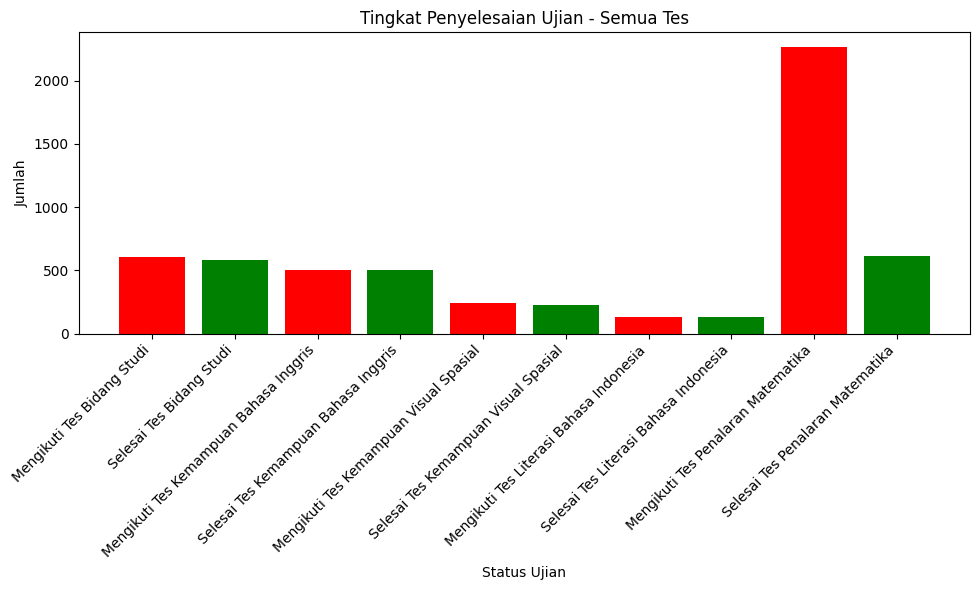

In [46]:
# Filter data for 'tes kemampuan bahasa inggris'
semua_tes = semua_tes[semua_tes['status_ujian'].str.contains('Tes Bidang Studi|Tes Kemampuan Bahasa Inggris|Tes Kemampuan Visual Spasial|Tes Literasi Bahasa Indonesia|Tes Penalaran Matematika')]

# Make a list of color based on 'status_ujian'
colour = ['red' if 'Mengikuti' in status else 'green' for status in semua_tes['status_ujian']]

plt.figure(figsize=(10, 6))
plt.bar(semua_tes['status_ujian'], semua_tes['Jumlah'], color=colour)
plt.title('Tingkat Penyelesaian Ujian - Semua Tes')
plt.xlabel('Status Ujian')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. How do the day and time of test completion vary? Do prospective students have specific preferences?

In [47]:
data_final.head()

,id_ujian,id_peserta,ujian_dimulai,ujian_ditutup,jenis_tes,timestamp_log,pesan_log,durasi_tes,status_ujian
0,29fbeda12fc84baaab209699439aba09,982b41ef78bcc73e9dcbb9110afce55b,2022-06-07 15:52:00,2022-06-09 21:00:00,Bidang Studi,2022-06-08 19:29:34,Selesai Tes Bidang Studi,191280.0,Selesai Tes Bidang Studi
1,29fbeda12fc84baaab209699439aba09,982b41ef78bcc73e9dcbb9110afce55b,2022-06-07 15:52:00,2022-06-09 21:00:00,Bidang Studi,2022-06-08 19:15:02,Memulai Tes Bidang Studi,191280.0,Mengikuti Tes Bidang Studi
2,e82a71007130c199a90961842d15b339,9f2de4269e67bd7e3d837026252a4bfb,2022-09-08 10:30:00,2022-09-09 10:30:00,Kemampuan Visual Spasial,2022-09-08 22:01:11,Selesai Tes Kemampuan Visual Spasial,86400.0,Selesai Tes Kemampuan Visual Spasial
3,e82a71007130c199a90961842d15b339,9f2de4269e67bd7e3d837026252a4bfb,2022-09-08 10:30:00,2022-09-09 10:30:00,Kemampuan Visual Spasial,2022-09-08 21:49:11,Memulai Tes Kemampuan Visual Spasial,86400.0,Mengikuti Tes Kemampuan Visual Spasial
4,8489127cbef60df4ff9aaeda12eeb327,b0afe01565fd69bc0c045ef84abc848e,2022-06-15 21:30:00,2022-06-16 23:59:00,Bidang Studi,2022-07-05 20:22:25,Memulai Tes Penalaran Matematika,95340.0,Mengikuti Tes Penalaran Matematika


In [48]:
timestamp_memulai = data_final[data_final['pesan_log'].astype(str).str.contains('Memulai Tes Bidang Studi|Memulai Tes Kemampuan Bahasa Inggris|Memulai Tes Kemampuan Visual Spasial|Memulai Tes Literasi Bahasa Indonesia|Memulai Tes Penalaran Matematika', na=False)]['timestamp_log']

# Take 'time' only
time_only = timestamp_memulai.dt.time
time_only_sorted = time_only.sort_values()

print(time_only_sorted)

6671    00:01:19
1083    00:04:08
4465    00:07:31
8981    00:08:18
5055    00:15:35
          ...   
9420    23:50:07
5949    23:51:01
5981    23:54:15
7484    23:56:03
9609    23:59:06
Name: timestamp_log, Length: 3751, dtype: object


In [50]:
# Temporary DataFrame
df_temp = pd.DataFrame({'time_only_sorted': time_only_sorted})

# Extract 'hour'
df_temp['hour'] = df_temp['time_only_sorted'].apply(lambda x: x.hour)

# interval within 3 jam
bins = range(0, 25, 3)

# Calculate the amount of data every interval
interval_counts = pd.cut(df_temp['hour'], bins).value_counts()

# Showing an interval with the most amount of data
most_common_interval = interval_counts.idxmax()
print(f"Interval with the most data: {most_common_interval}")
print(f"The quantity of the data: {interval_counts[most_common_interval]}")

print(interval_counts)

Interval with the most data: (18, 21]
The quantity of the data: 2084
hour
(18, 21]    2084
(12, 15]     425
(9, 12]      375
(6, 9]       333
(15, 18]     317
(21, 24]     143
(3, 6]        34
(0, 3]        19
Name: count, dtype: int64


# 4. Does the number of tests in the exam series affect the completion rate of prospective students?

In [51]:
# Convert timestamp column into datetime
data_final['ujian_dimulai'] = pd.to_datetime(data_final['ujian_dimulai'])
data_final['ujian_ditutup'] = pd.to_datetime(data_final['ujian_ditutup'])
data_final['timestamp_log'] = pd.to_datetime(data_final['timestamp_log'])

In [52]:
average_duration_per_test = data_final.groupby('jenis_tes')['durasi_tes'].mean()
print(average_duration_per_test)

jenis_tes
Bidang Studi                 187183.802599
Kemampuan Bahasa Inggris     179784.771287
Kemampuan Visual Spasial     315224.586626
Literasi Bahasa Indonesia    206878.797828
Penalaran Matematika         192769.037313
Name: durasi_tes, dtype: float64


In [53]:
data_final['durasi_tes'].fillna(data_final['durasi_tes'].mean(), inplace=True)

data_final['durasi_tes'] = pd.to_numeric(data['durasi_tes'], errors='coerce')

data_final = data_final.dropna(subset=['durasi_tes'])

In [54]:
descriptive_stats = data_final.groupby('jenis_tes')['durasi_tes'].describe()
print(descriptive_stats)

                            count           mean            std     min  \
jenis_tes                                                                 
Bidang Studi               1616.0  187183.802599  377321.876908     0.0   
Kemampuan Bahasa Inggris   4451.0  179784.771287  308119.532594     0.0   
Kemampuan Visual Spasial    658.0  315224.586626  528725.672322     0.0   
Literasi Bahasa Indonesia  1197.0  206878.797828  436042.119554  1039.0   
Penalaran Matematika       1742.0  192769.037313  348646.676342     0.0   

                               25%       50%       75%        max  
jenis_tes                                                          
Bidang Studi               82800.0  115140.0  174925.0  5349600.0  
Kemampuan Bahasa Inggris   86400.0  144000.0  175195.0  5349600.0  
Kemampuan Visual Spasial   86400.0  121800.0  233940.0  2592060.0  
Literasi Bahasa Indonesia  54000.0   90000.0  172800.0  2592000.0  
Penalaran Matematika       86400.0  125430.0  186465.0  5349600.0 

In [55]:
# Comparing
h_statistic, p_value_kruskal = kruskal(data_final['durasi_tes'][data_final['jenis_tes'] == 'tes1'],
                                        data_final['durasi_tes'][data_final['jenis_tes'] == 'tes2'],
                                        data_final['durasi_tes'][data_final['jenis_tes'] == 'tes3'],
                                        data_final['durasi_tes'][data_final['jenis_tes'] == 'tes4'],
                                        data_final['durasi_tes'][data_final['jenis_tes'] == 'tes5'])

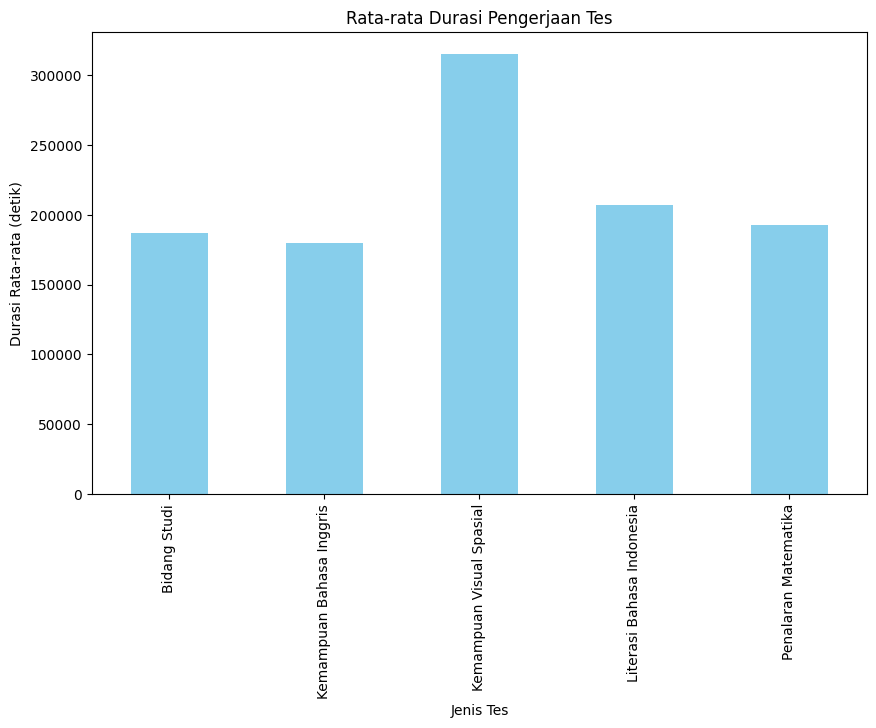

In [56]:
plt.figure(figsize=(10, 6))
average_duration_per_test.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Durasi Pengerjaan Tes')
plt.xlabel('Jenis Tes')
plt.ylabel('Durasi Rata-rata (detik)')
plt.show()

In [58]:
df = pd.read_excel('Kesimpulan.xlsx')

In [59]:
df.head()

,jenis_tes,jumlah_bagian_tes,mengikuti,selesai,tingkat_penyelesaian
0,Bidang Studi,1,609,581,95.402299
1,Kemampuan Bahasa Inggris,7,506,506,100.000000
2,Kemampuan Visual Spasial,1,238,224,94.117647
3,Literasi Bahasa Indonesia,6,130,130,100.000000
4,Penalaran Matematika,1,2268,613,27.028219


In [61]:
correlation = df['jumlah_bagian_tes'].corr(df['tingkat_penyelesaian'])

# Tampilkan korelasi
print(f"Correlation between 'jumlah_bagian_tes' dan 'tingkat_penyelesaian': {correlation}")

Correlation between 'jumlah_bagian_tes' dan 'tingkat_penyelesaian': 0.4792576644729291
